<a href="https://colab.research.google.com/github/seungwoo-Jang/modu_quest/blob/main/EXPLORATION_RS4/E03/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

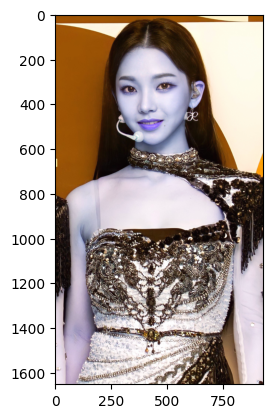

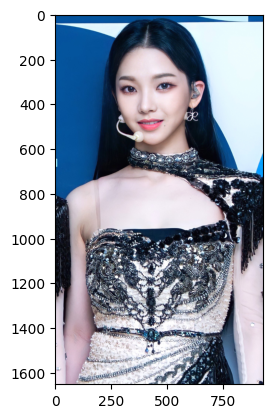

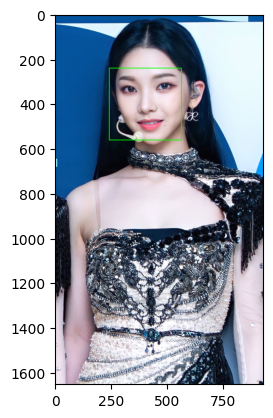

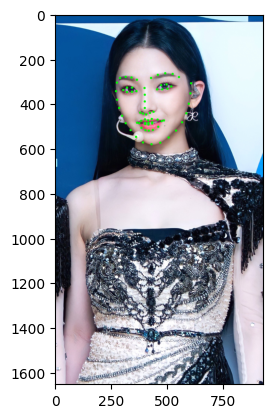

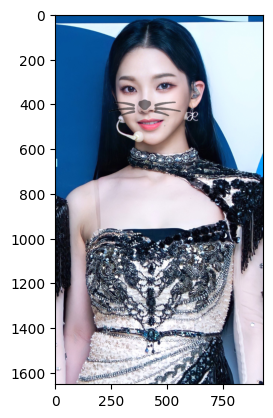

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
img_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/333cd9a7d427ffc1b46b85122bb0e0f2.png'
sticker_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/cat-whiskers.png'

img_bgr = cv2.imread(img_path) #rbg 순서가 다름
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #rgb 순서 맞추기
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb,1) #찾은 얼굴 좌표(좌,상,우,하)

img_rect = img_rgb.copy()  
for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()
  cv2.rectangle(img_rect, (l,t),
              (r,b),(0,255,0),
              2,lineType=cv2.LINE_AA
              )
plt.imshow(img_rect)
plt.show()

model_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
#좌측부터 0 시작 > 얼굴형 > 눈썹 > 코 > 눈 > 입
list_landmarks = []
for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  list_points = list(map(lambda p: (p.x,p.y), points.parts()))
  list_landmarks.append(list_points)

img_landmark = img_rgb.copy()  
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_landmark, point,5,(0,255,0),-1)
plt.imshow(img_landmark)
plt.show()
  
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  x = landmark[30][0]
  # y = landmark[30][1]
  y = landmark[30][1] + dlib_rect.height()//2
  w = h = dlib_rect.width()

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
refined_x = x - w // 2
refined_y = y - h

if refined_x < 0:
  img_sticker = img_sticker[:,-refined_x:]
  refined_x = 0
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:,:]
  refined_y = 0

img_sticker_apply = img_rgb.copy()
sticker_area = img_sticker_apply[refined_y:refined_y+img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]
                        ]
result = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.5, 0,dtype=cv2.CV_8U)
img_sticker_apply[refined_y:refined_y+img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]
                        ] = np.where(img_sticker==255,sticker_area,result).astype(np.uint8)

plt.imshow(img_sticker_apply)
